In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
def disable_pandas_warnings():
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings('ignore', '.A value is trying to be set on a copy of a slice from a DataFrame.')
    warnings.filterwarnings('ignore', '.indexing past lexsort depth may impact performance')
disable_pandas_warnings()

In [3]:
disasters = pd.read_csv('..\\DataSets\\UCLouvain\\disasters.csv')
disasters.head()

,Year,Disaster Subgroup,Disaster Type,Country,ISO,Region,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Affected
0,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,5.0,22.0,1990,5.0,22.0,NaN
1,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,7.0,1.0,1990,7.0,1.0,NaN
2,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,2.0,13.0,1990,2.0,15.0,NaN
3,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,2.0,25.0,1990,2.0,27.0,NaN
4,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,2.0,28.0,1990,3.0,1.0,NaN


In [5]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12853 entries, 0 to 12852
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12853 non-null  int64  
 1   Disaster Subgroup  12853 non-null  object 
 2   Disaster Type      12853 non-null  object 
 3   Country            12853 non-null  object 
 4   ISO                12853 non-null  object 
 5   Region             12853 non-null  object 
 6   Start Year         12853 non-null  int64  
 7   Start Month        12746 non-null  float64
 8   Start Day          10878 non-null  float64
 9   End Year           12853 non-null  int64  
 10  End Month          12564 non-null  float64
 11  End Day            10951 non-null  float64
 12  Total Affected     9916 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.3+ MB


### ELiminamos espacios en blanco de los nombres de las columnas y las pasamos a minúscula

In [6]:
disasters.columns = disasters.columns.str.replace(' ', '_').str.lower()

Eliminamos todos los datos posteriores al 2020, dado que sobrepasan el scope de nuestro trabajo y no todos los datasets los tienen.

In [7]:
disasters = disasters[disasters['year']< 2021]
disasters = disasters[disasters['end_year']< 2021]
disasters = disasters[disasters['start_year']<2021]

In [8]:
disasters.region.unique()

array(['Western Europe', 'Eastern Europe', 'Northern Europe',
       'Southern Europe', 'Russian Federation', 'Southern Asia',
       'Eastern Asia', 'Western Asia', 'South-Eastern Asia',
       'Central Asia', 'Australia and New Zealand', 'Polynesia',
       'Melanesia', 'Micronesia', 'South America', 'Caribbean',
       'Central America', 'Northern America', 'Middle Africa',
       'Western Africa', 'Southern Africa', 'Eastern Africa',
       'Northern Africa'], dtype=object)

In [9]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12850
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               12388 non-null  int64  
 1   disaster_subgroup  12388 non-null  object 
 2   disaster_type      12388 non-null  object 
 3   country            12388 non-null  object 
 4   iso                12388 non-null  object 
 5   region             12388 non-null  object 
 6   start_year         12388 non-null  int64  
 7   start_month        12285 non-null  float64
 8   start_day          10446 non-null  float64
 9   end_year           12388 non-null  int64  
 10  end_month          12099 non-null  float64
 11  end_day            10515 non-null  float64
 12  total_affected     9519 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.3+ MB


In [10]:
disasters.end_day.isna().mean()*100

15.119470455279302

### Rellenamos progesivamente los valores nulos de las columnas 'end_day', 'start_day', 'end_month' y 'start_month'

**Para 'end_day', primero filtramos por region, subgrupo de desaste y mes de finalización y le aplicamos el promedio de los datos existentes de 'end_day' que responden a esos filtros.**

In [11]:
disasters['end_day'] = disasters.groupby(['region', 'disaster_subgroup', 'end_month'],sort=False)['end_day'].apply(lambda x: x.fillna(x.mean()))

In [12]:
disasters.end_day.isna().mean()*100

3.9070067807555695

**Hacemos lo mismo para la columna 'start_day'**

In [13]:
disasters['start_day'] = disasters.groupby(['region', 'disaster_subgroup', 'start_month'],sort=False)['start_day'].apply(lambda x: x.fillna(x.mean()))

In [14]:
disasters.start_day.isna().mean()*100

3.672909267032612

**Ahora, para los nulos restantes en la columna 'end_year', imputamos la media de los valores existentes en esa columna filtrados por año y subgrupo de desastre**

In [15]:
disasters['end_day'] = disasters.groupby(['end_year', 'disaster_subgroup'],sort=False)['end_day'].apply(lambda x: x.fillna(x.mean()))

**Lo mismo hacemos para los valores faltantes de la columna 'end_month'**

In [16]:
disasters['end_month'] = disasters.groupby(['end_year', 'disaster_subgroup'],sort=False)['end_month'].apply(lambda x: x.fillna(x.mean()))

In [17]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12850
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               12388 non-null  int64  
 1   disaster_subgroup  12388 non-null  object 
 2   disaster_type      12388 non-null  object 
 3   country            12388 non-null  object 
 4   iso                12388 non-null  object 
 5   region             12388 non-null  object 
 6   start_year         12388 non-null  int64  
 7   start_month        12285 non-null  float64
 8   start_day          11933 non-null  float64
 9   end_year           12388 non-null  int64  
 10  end_month          12388 non-null  float64
 11  end_day            12388 non-null  float64
 12  total_affected     9519 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.3+ MB


**Y ahora con la columna 'start_day'**

In [18]:
disasters['start_day'] = disasters.groupby(['start_year', 'disaster_subgroup'],sort=False)['start_day'].apply(lambda x: x.fillna(x.mean()))

In [19]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12850
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               12388 non-null  int64  
 1   disaster_subgroup  12388 non-null  object 
 2   disaster_type      12388 non-null  object 
 3   country            12388 non-null  object 
 4   iso                12388 non-null  object 
 5   region             12388 non-null  object 
 6   start_year         12388 non-null  int64  
 7   start_month        12285 non-null  float64
 8   start_day          12388 non-null  float64
 9   end_year           12388 non-null  int64  
 10  end_month          12388 non-null  float64
 11  end_day            12388 non-null  float64
 12  total_affected     9519 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.3+ MB


In [20]:
disasters['start_month'] = disasters.groupby(['start_year', 'disaster_subgroup'],sort=False)['start_month'].apply(lambda x: x.fillna(x.mean()))

In [21]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12850
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               12388 non-null  int64  
 1   disaster_subgroup  12388 non-null  object 
 2   disaster_type      12388 non-null  object 
 3   country            12388 non-null  object 
 4   iso                12388 non-null  object 
 5   region             12388 non-null  object 
 6   start_year         12388 non-null  int64  
 7   start_month        12388 non-null  float64
 8   start_day          12388 non-null  float64
 9   end_year           12388 non-null  int64  
 10  end_month          12388 non-null  float64
 11  end_day            12388 non-null  float64
 12  total_affected     9519 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.3+ MB


In [22]:
disasters.total_affected.isna().mean()*100

23.159509202453986

**Para completar los nulos de la columna de total de afectados, filtramos por región y por subgrupo de desastre e imputamos la mediana del total de afectados existente** 

In [23]:
disasters['total_affected'] = disasters.groupby(['region', 'disaster_subgroup'],sort=False)['total_affected'].apply(lambda x: x.fillna(x.median()))

In [24]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12850
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               12388 non-null  int64  
 1   disaster_subgroup  12388 non-null  object 
 2   disaster_type      12388 non-null  object 
 3   country            12388 non-null  object 
 4   iso                12388 non-null  object 
 5   region             12388 non-null  object 
 6   start_year         12388 non-null  int64  
 7   start_month        12388 non-null  float64
 8   start_day          12388 non-null  float64
 9   end_year           12388 non-null  int64  
 10  end_month          12388 non-null  float64
 11  end_day            12388 non-null  float64
 12  total_affected     12378 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.3+ MB


In [25]:
disasters.total_affected.isna().mean()*100

0.08072328059412334

**Para terminar, imputamos la mediana del subgrupo de desastre correspondiente**

In [26]:
disasters['total_affected'] = disasters.groupby( 'disaster_subgroup',sort=False)['total_affected'].apply(lambda x: x.fillna(x.median()))

In [27]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12850
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               12388 non-null  int64  
 1   disaster_subgroup  12388 non-null  object 
 2   disaster_type      12388 non-null  object 
 3   country            12388 non-null  object 
 4   iso                12388 non-null  object 
 5   region             12388 non-null  object 
 6   start_year         12388 non-null  int64  
 7   start_month        12388 non-null  float64
 8   start_day          12388 non-null  float64
 9   end_year           12388 non-null  int64  
 10  end_month          12388 non-null  float64
 11  end_day            12388 non-null  float64
 12  total_affected     12388 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.3+ MB


**Creamos las columnas 'start_date' y 'end_date' en formato datetime a partir de las columnas 'start_day', 'start_month', 'end_day', 'end_month', 'start_year', 'end_year'. Previamente, convetimos en integer las que eran de tipo float.**

In [28]:
disasters[['start_day', 'start_month', 'end_day', 'end_month']] = disasters[['start_day', 'start_month', 'end_day', 'end_month']].astype(int)

In [29]:
disasters.head()

,year,disaster_subgroup,disaster_type,country,iso,region,start_year,start_month,start_day,end_year,end_month,end_day,total_affected
0,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,5,22,1990,5,22,130.0
1,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,7,1,1990,7,1,130.0
2,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,2,13,1990,2,15,130.0
3,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,2,25,1990,2,27,130.0
4,1990,Meteorological,Storm,Austria,AUT,Western Europe,1990,2,28,1990,3,1,130.0


In [30]:
disasters.tail()

,year,disaster_subgroup,disaster_type,country,iso,region,start_year,start_month,start_day,end_year,end_month,end_day,total_affected
12820,2020,Hydrological,Flood,Zambia,ZMB,Eastern Africa,2020,1,13,2020,1,17,1500.0
12821,2020,Hydrological,Flood,Zambia,ZMB,Eastern Africa,2020,3,20,2020,3,26,700000.0
12822,2020,Hydrological,Flood,South Sudan,SSD,Northern Africa,2020,7,13,2020,12,17,1042000.0
12849,2019,Biological,Epidemic,Sudan (the),SDN,Northern Africa,2019,4,10,2019,12,11,2098.0
12850,2020,Biological,Epidemic,Sudan (the),SDN,Northern Africa,2020,3,9,2020,12,11,2137.0


In [31]:
disasters.rename(columns={'start_year':'Year', 'start_month':'month', 'start_day':'day'}, inplace=True)

In [32]:
disasters['start_date'] = pd.to_datetime(disasters[['day','month','Year']])
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12850
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               12388 non-null  int64         
 1   disaster_subgroup  12388 non-null  object        
 2   disaster_type      12388 non-null  object        
 3   country            12388 non-null  object        
 4   iso                12388 non-null  object        
 5   region             12388 non-null  object        
 6   Year               12388 non-null  int64         
 7   month              12388 non-null  int32         
 8   day                12388 non-null  int32         
 9   end_year           12388 non-null  int64         
 10  end_month          12388 non-null  int32         
 11  end_day            12388 non-null  int32         
 12  total_affected     12388 non-null  float64       
 13  start_date         12388 non-null  datetime64[ns]
dtypes: dat

In [33]:
disasters.rename(columns={'Year':'start_year', 'month':'start_month', 'day':'start_day'}, inplace=True)

In [34]:
disasters.rename(columns={'end_year':'Year', 'end_month':'month', 'end_day':'day'}, inplace=True)

In [35]:
disasters['end_date'] = pd.to_datetime(disasters[['Year','month','day']])
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12850
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               12388 non-null  int64         
 1   disaster_subgroup  12388 non-null  object        
 2   disaster_type      12388 non-null  object        
 3   country            12388 non-null  object        
 4   iso                12388 non-null  object        
 5   region             12388 non-null  object        
 6   start_year         12388 non-null  int64         
 7   start_month        12388 non-null  int32         
 8   start_day          12388 non-null  int32         
 9   Year               12388 non-null  int64         
 10  month              12388 non-null  int32         
 11  day                12388 non-null  int32         
 12  total_affected     12388 non-null  float64       
 13  start_date         12388 non-null  datetime64[ns]
 14  end_da

In [36]:
disasters.rename(columns={'Year':'end_year', 'month':'end_month', 'day':'end_day'}, inplace=True)


In [37]:
correlation = disasters.corr(numeric_only=True)

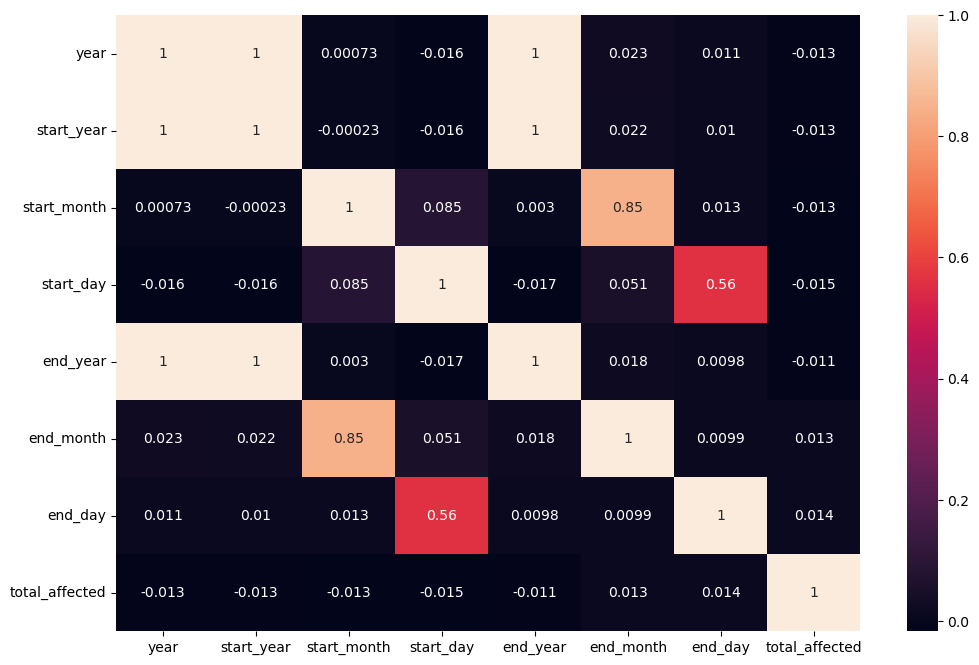

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(correlation, annot=True, annot_kws={'size' : 10}, ax=ax)

plt.show()

## Normalización de los datos

#### Se eliminan las columnas correspondientes a los años, los meses y los dias de comienzo y finalización de los desastres y la columna de fecha de inicio de dichos desastres, ya que sólo se medirá cómo afecta la de fecja de finalización.

In [39]:
disasters.drop(['start_year', 'start_month', 'start_day', 'end_year', 'end_month', 'end_day', 'start_date'],axis=1, inplace=True)

In [40]:
len(disasters['country'].unique())

224

In [41]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12850
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               12388 non-null  int64         
 1   disaster_subgroup  12388 non-null  object        
 2   disaster_type      12388 non-null  object        
 3   country            12388 non-null  object        
 4   iso                12388 non-null  object        
 5   region             12388 non-null  object        
 6   total_affected     12388 non-null  float64       
 7   end_date           12388 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 871.0+ KB


#### Cambiar el tipo de dato de la columna

In [42]:
disasters['year'] = pd.to_datetime(disasters['year'], format='%Y')

In [43]:
disasters['total_affected'] = disasters['total_affected'].astype('int')

### Cambios en la columna country

In [44]:
disasters.rename(columns = {'country' : 'country_name'}, inplace = True)

#### Llevar todos los valores string a mayúsculas

In [45]:
for columna in disasters.columns:
    if disasters[columna].dtype == 'object':
        disasters[columna] = disasters[columna].apply(lambda x: x.upper())

In [46]:
disasters

,year,disaster_subgroup,disaster_type,country_name,iso,region,total_affected,end_date
0,1990-01-01,METEOROLOGICAL,STORM,AUSTRIA,AUT,WESTERN EUROPE,130,1990-05-22
1,1990-01-01,METEOROLOGICAL,STORM,AUSTRIA,AUT,WESTERN EUROPE,130,1990-07-01
2,1990-01-01,METEOROLOGICAL,STORM,AUSTRIA,AUT,WESTERN EUROPE,130,1990-02-15
3,1990-01-01,METEOROLOGICAL,STORM,AUSTRIA,AUT,WESTERN EUROPE,130,1990-02-27
4,1990-01-01,METEOROLOGICAL,STORM,AUSTRIA,AUT,WESTERN EUROPE,130,1990-03-01
...,...,...,...,...,...,...,...,...
12820,2020-01-01,HYDROLOGICAL,FLOOD,ZAMBIA,ZMB,EASTERN AFRICA,1500,2020-01-17
12821,2020-01-01,HYDROLOGICAL,FLOOD,ZAMBIA,ZMB,EASTERN AFRICA,700000,2020-03-26
12822,2020-01-01,HYDROLOGICAL,FLOOD,SOUTH SUDAN,SSD,NORTHERN AFRICA,1042000,2020-12-17
12849,2019-01-01,BIOLOGICAL,EPIDEMIC,SUDAN (THE),SDN,NORTHERN AFRICA,2098,2019-12-11


In [47]:
disasters.iso.isna().sum()

0

### Estandarizar los nombres de los países para que sean iguales en todos los datasets

In [48]:
est = pd.read_csv('..\\DataSets\\estandar_paises_regiones.csv')

In [49]:
est

,region_name,sub-region_name,country_name,iso
0,AFRICA,NORTHERN AFRICA,ALGERIA,DZA
1,AFRICA,NORTHERN AFRICA,EGYPT,EGY
2,AFRICA,NORTHERN AFRICA,LIBYA,LBY
3,AFRICA,NORTHERN AFRICA,MOROCCO,MAR
4,AFRICA,NORTHERN AFRICA,SUDAN,SDN
...,...,...,...,...
244,OCEANIA,POLYNESIA,TONGA,TON
245,OCEANIA,POLYNESIA,TUVALU,TUV
246,OCEANIA,POLYNESIA,WALLIS AND FUTUNA ISLANDS,WLF
247,EUROPE,SOUTHERN EUROPE,KOSOVO,XXK


#### En este punto se puede hacer un merge por la izquierda en la columna iso, siendo el dataframe principal el que ocupe la posición izquierda y el estandar la derecha. Pero se tiene más control del proceso si se trabaja directamente con los nombres.

In [50]:
# guardamos los valores únicos de los nombres de países de cada data frame
paises_disasters = set(disasters['country_name'])
paises_est = set(est['country_name'])

In [51]:
# Identificamos el dataframe con menos países (debería ser el data frame principal de este notebook)
if len(paises_disasters) <= len(paises_est):
    df_menos_paises = disasters
    df_mas_paises = est
else:
    df_menos_paises = est
    df_menos_paises = disasters

In [52]:
# Obtenemos los nombres únicos de países en el dataframe con menos nombres
paises_menos = set(df_menos_paises['country_name'])

In [53]:
# Obtenemos los nombres únicos de países en el dataframe con más nombres
paises_mas = set(df_mas_paises['country_name'])

In [54]:
# Obtener nombres únicos de países que están en el dataframe con menos nombres y no en el dataframe con más nombres
paises_no_comunes = paises_menos.difference(paises_mas)

#### Los siguientes nombres tienen que ser reemplazados en el dataframe df 

In [55]:
print(paises_no_comunes)

{'TANZANIA, UNITED REPUBLIC OF', 'MARSHALL ISLANDS (THE)', 'WALLIS AND FUTUNA', 'NETHERLANDS (THE)', 'SERBIA MONTENEGRO', 'YUGOSLAVIA', 'KOREA (THE REPUBLIC OF)', 'DOMINICAN REPUBLIC (THE)', 'BOLIVIA (PLURINATIONAL STATE OF)', 'NETHERLANDS ANTILLES', 'GERMANY FED REP', 'TURKS AND CAICOS ISLANDS (THE)', 'MICRONESIA (FEDERATED STATES OF)', 'SAINT HELENA, ASCENSION AND TRISTAN DA CUNHA', 'MACEDONIA (THE FORMER YUGOSLAV REPUBLIC OF)', 'SUDAN (THE)', 'TURKEY', 'UNITED STATES OF AMERICA (THE)', 'CONGO (THE)', 'UNITED ARAB EMIRATES (THE)', 'CZECHOSLOVAKIA', 'NORTHERN MARIANA ISLANDS (THE)', 'COMOROS (THE)', 'CAYMAN ISLANDS (THE)', 'CANARY IS', 'MOLDOVA (THE REPUBLIC OF)', 'BAHAMAS (THE)', 'CÔTE D\x92IVOIRE', 'AZORES ISLANDS', 'IRAN (ISLAMIC REPUBLIC OF)', 'PALESTINE, STATE OF', 'SOVIET UNION', 'CZECH REPUBLIC (THE)', 'VIRGIN ISLAND (BRITISH)', 'RUSSIAN FEDERATION (THE)', 'TAIWAN (PROVINCE OF CHINA)', 'SAINT MARTIN (FRENCH PART)', 'VIRGIN ISLAND (U.S.)', 'VENEZUELA (BOLIVARIAN REPUBLIC OF)', '

In [56]:
reemplazos ={"'KOREA (THE DEMOCRATIC PEOPLE''S REPUBLIC OF)'" : 'NORTH KOREA' ,
 "'LAO PEOPLE''S DEMOCRATIC REPUBLIC (THE)'": "LAOS",
 'AZORES ISLANDS': 'PORTUGAL',
 'BAHAMAS (THE)': "BAHAMAS",
 'BOLIVIA (PLURINATIONAL STATE OF)': "BOLIVIA",
 'CANARY IS': "SPAIN",
 'CAYMAN ISLANDS (THE)':"CAYMAN ISLANDS",
 'COMOROS (THE)': "COMOROS",
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': "DEMOCRATIC REPUBLIC OF THE CONGO",
 'CONGO (THE)': 'CONGO',
 'COOK ISLANDS (THE)': 'COOK ISLANDS',
 'CZECH REPUBLIC (THE)': 'CZECHIA',
 'CZECHOSLOVAKIA': 'CZECHIA',
 'CÔTE D\x92IVOIRE': 'CÔTE D’IVOIRE',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'GERMANY FED REP': 'GERMANY',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'KOREA (THE REPUBLIC OF)': 'SOUTH KOREA',
 'MACEDONIA (THE FORMER YUGOSLAV REPUBLIC OF)': 'NORTH MACEDONIA',
 'MARSHALL ISLANDS (THE)': 'MARSHALL ISLANDS',
 'MICRONESIA (FEDERATED STATES OF)': 'MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NETHERLANDS ANTILLES': 'CURAÇAO',
 'NIGER (THE)': 'NIGER',
 'NORTHERN MARIANA ISLANDS (THE)': 'NORTHERN MARIANA ISLANDS',
 'PALESTINE, STATE OF': 'STATE OF PALESTINE',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAINT HELENA, ASCENSION AND TRISTAN DA CUNHA': 'SAINT HELENA',
 'SAINT MARTIN (FRENCH PART)': 'SAINT MARTIN',
 'SERBIA MONTENEGRO': 'SERBIA',
 'SINT MAARTEN (DUTCH PART)': 'SINT MAARTEN',
 'SOVIET UNION': 'RUSSIA',
 'SUDAN (THE)': "SUDAN",
 'TAIWAN (PROVINCE OF CHINA)': 'CHINA, TAIWAN',
 'TANZANIA, UNITED REPUBLIC OF': 'TANZANIA',
 'TURKEY': 'TÜRKIYE',
 'TURKS AND CAICOS ISLANDS (THE)': 'TURKS AND CAICOS ISLANDS',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',
 'VENEZUELA (BOLIVARIAN REPUBLIC OF)': 'VENEZUELA',
 'VIRGIN ISLAND (BRITISH)': 'BRITISH VIRGIN ISLANDS',
 'VIRGIN ISLAND (U.S.)': 'UNITED STATES VIRGIN ISLANDS',
 'WALLIS AND FUTUNA': 'WALLIS AND FUTUNA ISLANDS',
 'YUGOSLAVIA': 'SERBIA'
    
}

Como criterio de reemplazo de los antigüos países decidimos tomar como actual país al más representivos de aquellos. Así, por ejemplo, Rusia quedó con todos los registros pertenecientes a la Unión Soviética. Algo similar sucedión con Serbia y República Checa, que heredaron los registros de Yugoslavia y Checoslovaquia; Serbia además heredó registrso de Serbia y Montenegro.

In [57]:
disasters[disasters.country_name == 'WALLIS AND FUTUNA']

,year,disaster_subgroup,disaster_type,country_name,iso,region,total_affected,end_date
7123,1993-01-01,GEOPHYSICAL,EARTHQUAKE,WALLIS AND FUTUNA,WLF,POLYNESIA,20,1993-03-13
7457,2012-01-01,METEOROLOGICAL,STORM,WALLIS AND FUTUNA,WLF,POLYNESIA,1252,2012-12-15


In [58]:
est[est.iso == "WLF"]

,region_name,sub-region_name,country_name,iso
246,OCEANIA,POLYNESIA,WALLIS AND FUTUNA ISLANDS,WLF


In [59]:
disasters.country_name = disasters.country_name.replace(reemplazos)

### Chequeamos que los nombres hayan sido sustituídos, no debería haber diferencias entre ambos sets, por lo tanto deberíamosobtener un set vacío

In [60]:
paises_menos = set(df_menos_paises['country_name'])
paises_mas = set(df_mas_paises['country_name'])
paises_no_comunes = paises_menos.difference(paises_mas)
paises_no_comunes

set()

In [62]:
disasters.to_csv('..\\DataSets\\UCLouvain\\disasters_final.csv', index = False)

### Los gráficos de abajo pueden ser útiles para la etapa del EDA

In [62]:
# fig, ax = plt.subplots(figsize=(20, 10))
# sns.histplot(data=disasters, x='disaster_subgroup',kde=True)
# plt.show()


In [63]:
# disasters.head(3)

In [64]:
# sns.set(rc={'figure.figsize':(25,10)})
# sns.set(font_scale=1.5)
# ax = sns.lineplot(x="region", y="end_date",
#                 hue="disaster_subgroup",
#                 linewidth=3,
#                 err_style=None,
#                 data=disasters)

# plt.xticks(rotation = 90)

# plt.show()

In [65]:
# sns.set(rc={'figure.figsize':(40,20)})
# sns.set(font_scale=2)
# ax = sns.lineplot(x="region", y="end_date",
#                 hue="disaster_type",
#                 err_style=None,
#                 linewidth=4,
#                 style='disaster_type',
#                 palette="flare",
#                 markers=True,
#                 data=disasters)

# plt.xticks(rotation = 90)

# plt.show()

In [66]:
# sns.set(rc={'figure.figsize':(15,8)})
# sns.relplot(
#     data=disasters, x="end_date", y="total_affected",
#     row="region", hue="disaster_subgroup", style="disaster_subgroup",
#     kind="line"
# )
# plt.show()